# Na aula anterior...

Por que precisamos podar as árvores?

Precisamos nos preocupar com outliers em árvores de decisão? Por que?

# Hoje!

In [96]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

import matplotlib.pyplot as plt

In [5]:
modelo = DecisionTreeClassifier(max_depth = 4, min_samples_split = 0.2)

## Usos da árvore além de modelos

**Criar categorizações:** usando o Titanic, construa uma árvore para fazer previsão em Survived usando *apenas uma*  feature contínua (`age`) e profundidade baixa (`max_leaf_nodes = 3`), em seguida visualize essa árvore. O que você consegue concluir?

> PS: Lembrem de definir a `random_state = 1`

In [84]:
df_treino[var_expl].shape

(712,)

In [85]:
df_treino[[var_expl]].shape

(712, 1)

In [86]:
df = pd.read_csv('dados/titanic.csv')

df['Age'] = df['Age'].fillna(value = df['Age'].mean())

var_expl = ['Age']
var_resp = 'Survived'

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 1)

x_treino = df_treino[var_expl].copy()
x_teste = df_teste[var_expl].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

modelo = DecisionTreeClassifier(max_leaf_nodes = 3, random_state = 1)
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict_proba(x_teste)[:, 1]

roc_auc_score(y_teste, y_teste_pred)

0.4722150426466787

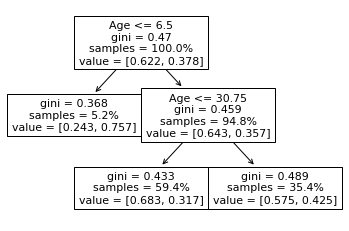

In [88]:
plot_tree(modelo, feature_names = ['Age'], proportion = True )
plt.show()

Categorizando as idades:

In [42]:
def categorizador_idade(idade):
    
    if idade <= 6.5:
        return 1
    elif idade <= 30.5:
        return 2
    else:
        return 3

In [43]:
df['Age_cat'] = df['Age'].apply(categorizador_idade)

In [47]:
df['Age'].argmax()

630

In [49]:
df[['Age', 'Age_cat']].iloc[625:635]

,Age,Age_cat
625,61,3
626,57,3
627,21,2
628,26,2
629,29,2
630,80,3
631,51,3
632,32,3
633,29,2
634,9,2


In [50]:
from sklearn.linear_model import LogisticRegression

In [68]:
var_expl = ['Age_cat']
var_resp = 'Survived'

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 1)

x_treino = df_treino[var_expl].copy()
x_teste = df_teste[var_expl].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

modelo.predict_proba([[3]])[:, 1]

array([0.37100581])

In [66]:
modelo.coef_*3

array([[-0.12456105]])

In [67]:
modelo.coef_*3

array([[-0.12456105]])

**Fazer seleção de feature:** construa uma árvore com todas as features disponíveis, porém com profundidade baixa (`max_leaf_nodes = 3`), em seguida visualize essa árvore. Todas as features aparecem nessa árvore?

> PS: não utilizar Cabin, e dropar as linhas que forem missing

In [93]:
df = pd.read_csv('dados/titanic.csv')

var_expl_cat = ['Embarked', 'Sex']
var_expl_num = ['Pclass', 'Age', 'SibSp','Parch', 'Fare', ]

var_expl = var_expl_cat + var_expl_num
var_resp = 'Survived'

In [94]:
df.dropna(subset = var_expl, inplace=True)

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 1)

x_treino = df_treino[var_expl].copy()
x_teste = df_teste[var_expl].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

In [103]:
oe = OrdinalEncoder()
x_treino[var_expl_cat] = oe.fit_transform(x_treino[var_expl_cat])
x_teste[var_expl_cat] = oe.transform(x_teste[var_expl_cat])

modelo1 = DecisionTreeClassifier(max_leaf_nodes = 7, random_state = 1)
modelo1.fit(x_treino, y_treino)

y_teste_pred = modelo1.predict_proba(x_teste)[:, 1]

roc_auc_score(y_teste, y_teste_pred)

0.8072008113590263

In [104]:
x_treino.columns

Index(['Embarked', 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

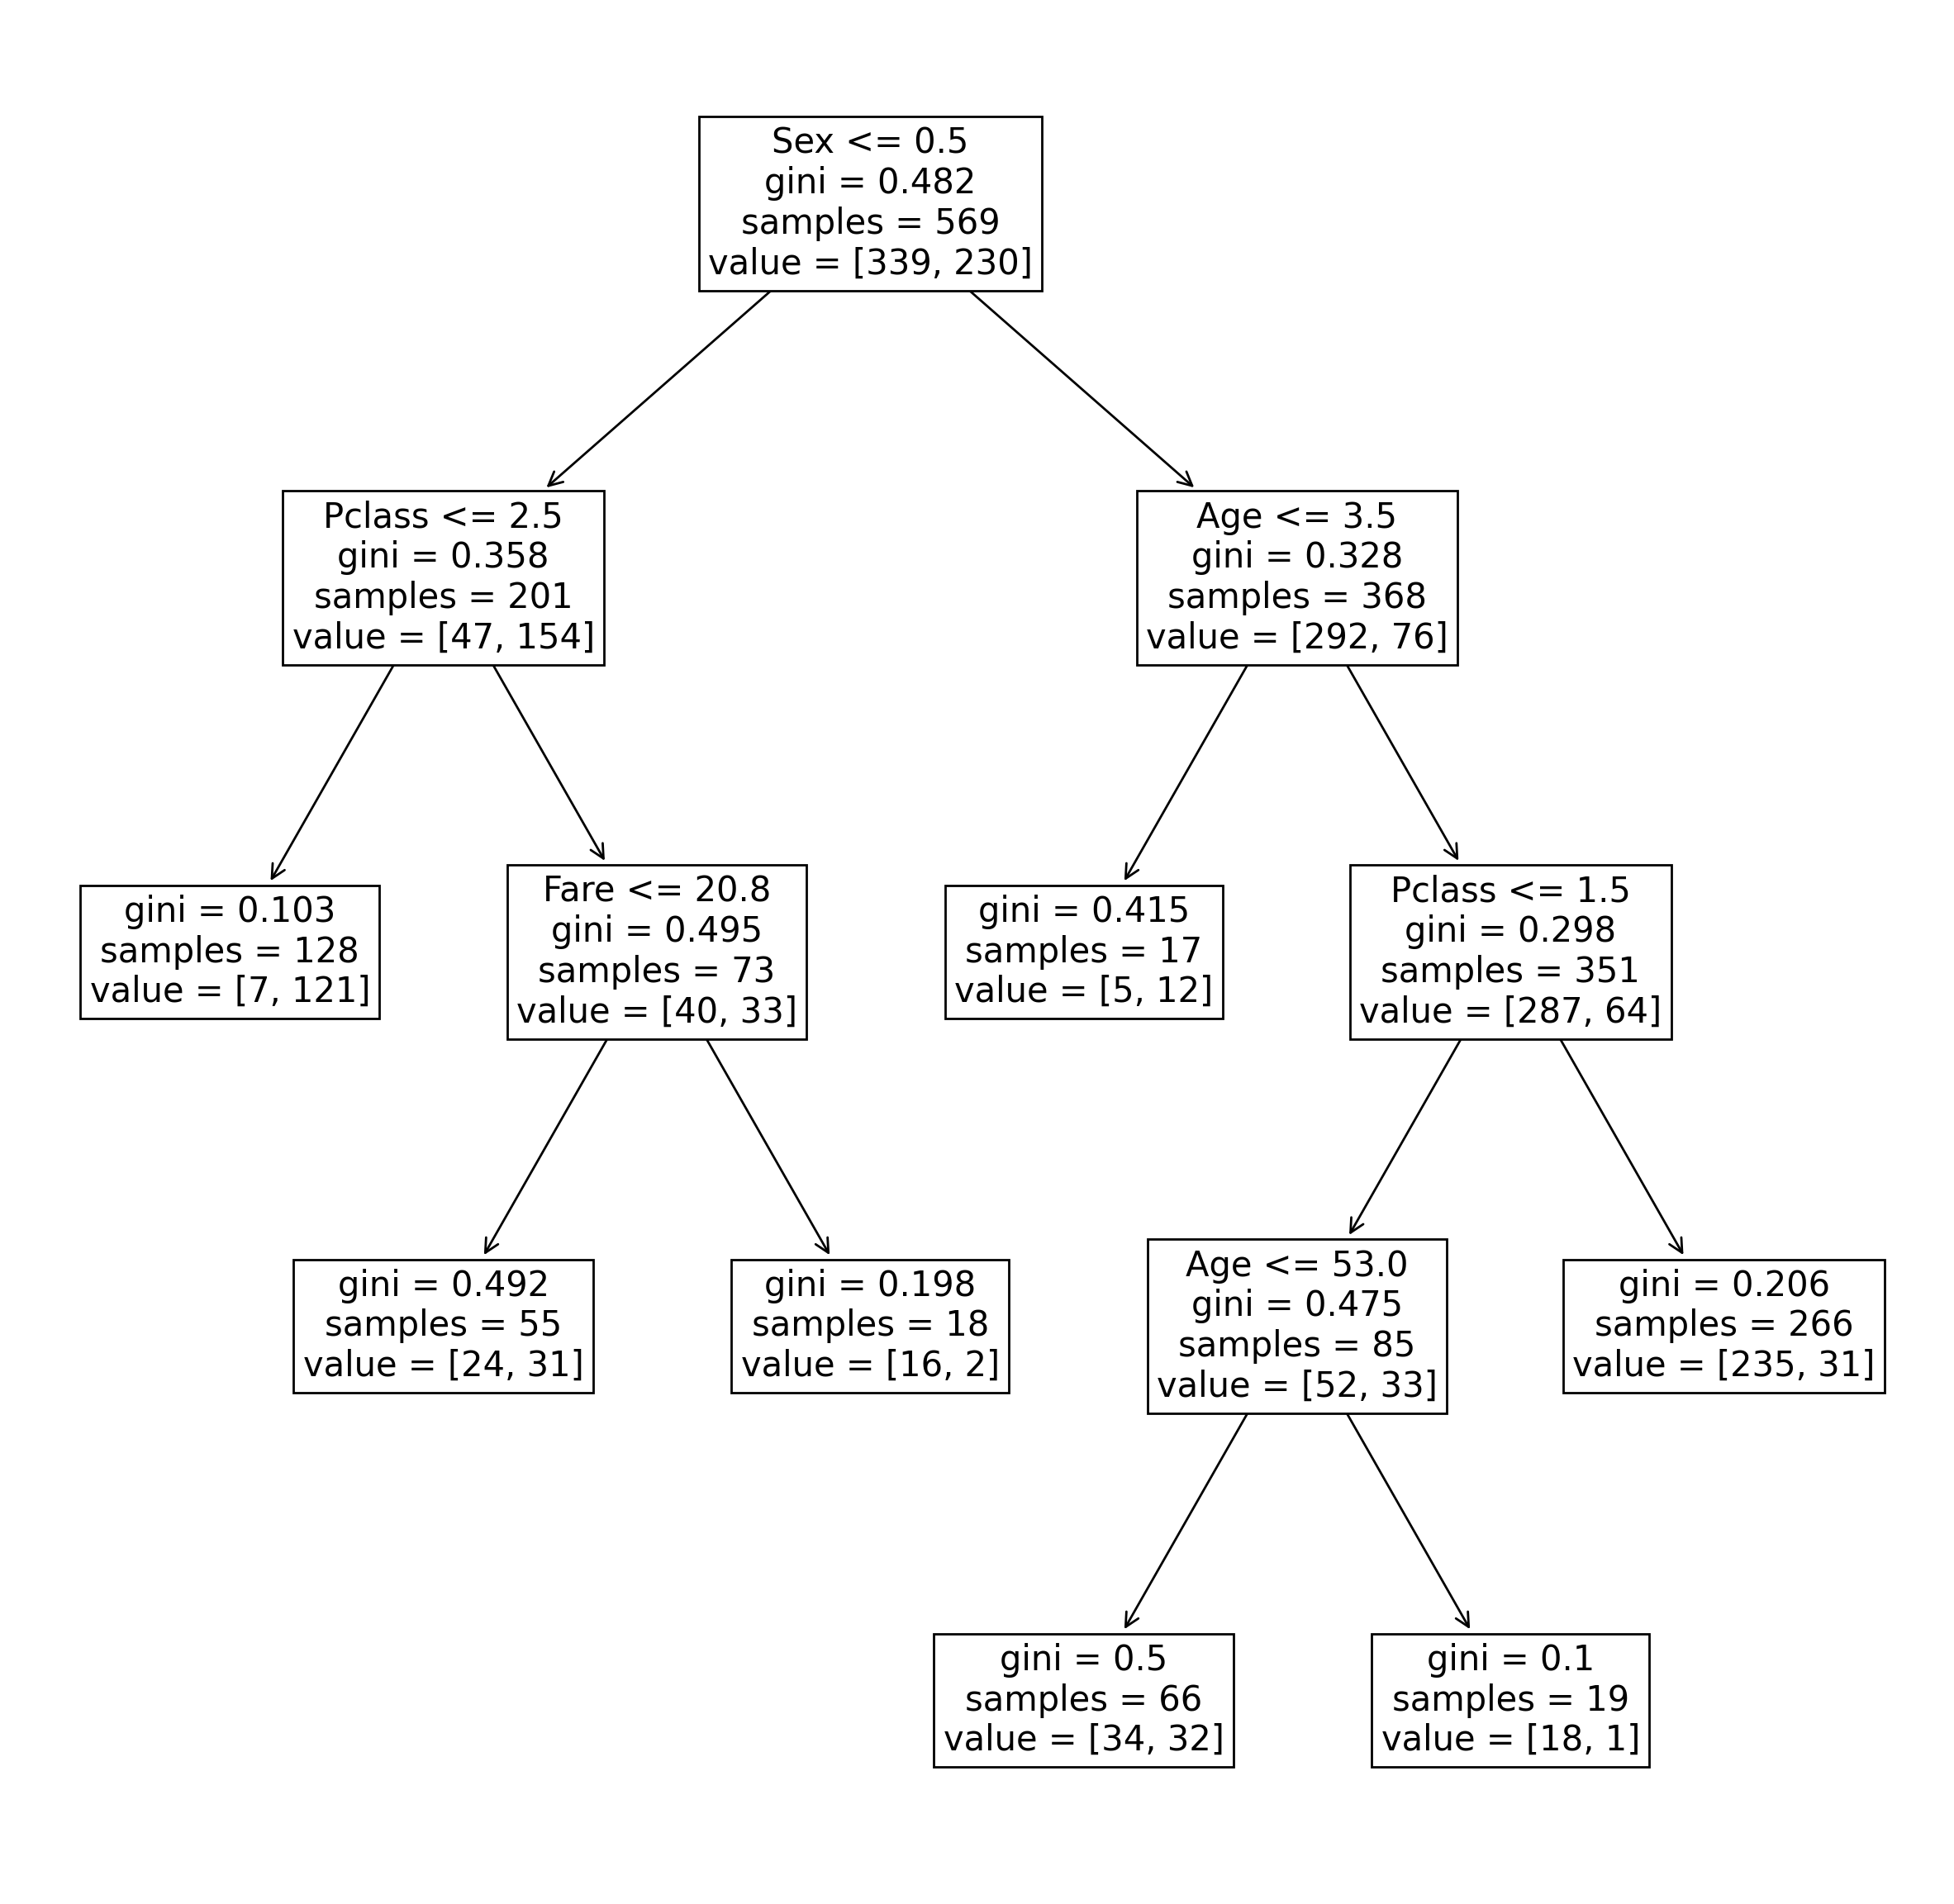

In [105]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi = 200)

plot_tree(modelo1, 
          fontsize = 15, 
          ax = ax, 
          feature_names = x_treino.columns)

plt.show()

In [110]:
pd.Series({i:j for i, j in zip(x_treino.columns, modelo1.feature_importances_)})

Embarked    0.000000
Sex         0.609891
Pclass      0.240651
Age         0.107858
SibSp       0.000000
Parch       0.000000
Fare        0.041600
dtype: float64

## Utilidades do sklearn
Case Exemplo:
    
Você está tratando dados sobre COVID-19, querendo identificar se uma determinada pessoa foi contaminada pelo vírus usando apenas informação que não são diretamente relacionadas à saúde (atuação profissional, idade, peso, sexo, cidade onde mora, cidade onde trabalha, quantidade de casos no Brasil, quantidade de mortes no Brasil).

Para isso, você separou os dados em dois conjuntos, um para treino (de jan/21 até jun/21) e outro para teste (jul/21 em diante). Você optou por usar um KNN, e para isso precisou usar o MinMaxScaler para deixar todos os dados na mesma escala, incluindo a quantidade de mortes no Brasil.  MinMaxScaler usa a seguinte fórmula para fazer o redimensionamento, e para isso você precisou olhar para os dados e identificar o x_max e o x_min.

x_final = (x - x_min) / (x_max - x_min)

Baseado nos dados (reais que vemos nos jornais), qual o x_min e o x_max que devem ser usados?

<a href="https://www.google.com/search?q=estatisticas+covid+brasil&bih=666&biw=1280&hl=en&sxsrf=ALeKk00BvVGoh1F6CPgprcYl5erOw8CHOQ%3A1617141467586&ei=255jYLScI6zA5OUPt-2fsAw&oq=estatisticas+covid+brasil&gs_lcp=Cgdnd3Mtd2l6EAMyBAgAEA0yBggAEAcQHjIGCAAQBxAeMgYIABAHEB4yBggAEAcQHjIGCAAQBxAeMgYIABAHEB4yBggAEAcQHjIICAAQCBAHEB46CAgAELADEMsBOgcIABCwAxBDOgUIABDLAToECAAQHjoGCAAQCBAeUJyfBliFrgZgnK8GaAJwAHgAgAG2AogB4BySAQYyLTEzLjGYAQCgAQGqAQdnd3Mtd2l6yAEKwAEB&sclient=gws-wiz&ved=0ahUKEwj09ee1gdnvAhUsILkGHbf2B8YQ4dUDCA0&uact=5">
<img src = "imagens/covid.png" width = 50% />
</a>

In [115]:
(450 - 50)/(500 - 50)

0.8888888888888888

- Data Leakage é um baita problema, e o sklearn nos ajuda a mitigá-lo.
- sklearn segue um padrão para modelos e transformadores
    - Esse padrão inclusive pode ser apontado como uma das causas do enorme sucesso do sklearn


Padrão de Modelos: 
```
modelo = ModeloDePrevisao(hiperparâmetros)

modelo.fit(x_treino, y_treino)
y_pred = modelo.preditc(x_teste)

metrica(y_teste, y_pred)
```

Padrão de Transformadores:
```
trans = Transformador(hiperparâmetros)

x_treino = trans.fit_transform(x_treino)
x_teste = trans.transform(x_teste)
```

- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html)
- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)
- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)

In [121]:
from sklearn.preprocessing import Binarizer

df = pd.read_csv('dados/titanic.csv')

binarizer = Binarizer(threshold = 6.5)
binarizer.fit_transform(df[['Age']].dropna())

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [124]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('dados/titanic.csv')

ohe = OneHotEncoder(sparse = False)
ohe.fit_transform(df[['Embarked']].dropna())

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [125]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [126]:
df[['Embarked']].dropna().head(3)

,Embarked
0,S
1,C
2,S


In [139]:
from sklearn.preprocessing import KBinsDiscretizer

df = pd.read_csv('dados/titanic.csv')

kbins = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'kmeans')
pd.DataFrame(kbins.fit_transform(df[['Age']].dropna())).value_counts(normalize = 1)

1.0    0.431373
0.0    0.387955
2.0    0.180672
dtype: float64

In [141]:
kbins.bin_edges_

array([array([ 0.42      , 24.21852208, 42.45311713, 80.        ])],
      dtype=object)

### Projeto
Usando o [dataset do projeto](https://drive.google.com/file/d/17fyteuN2MdGdbP5_Xq_sySN_yH91vTup/view?usp=sharing), crie modelos usando Árvore de Decisão e KNN para identificar se uma pessoa será adimplente ou inadimplente, realizando os pré-processamentos necessários para cada um. Utilize a metodologia de avaliação de sua preferência, mas seu modelo será avaliado em um conjunto apartado. Que conclusões você consegue tirar a partir do modelo?

- Escolham apenas 5 variáveis dentro das 100+ disponíveis

In [149]:
import random

total = [
    'Adriana Roberta Miceli de Souza',
    'Amanda Barbosa Morais',
    'Amanda Costa Spolti',
    'Angelica Valiati Maran Derenevick',
    'Bruno Baring',
    'DEBORA KASSEM BUTURI',
    'Deborah Soares Cardoso',
    'Eden de Oliveira Santana',
    'FREDERICO FERNANDES SOARE',
    'Helen Cristina de Acypreste Rocha',
    'Karina Baumgarten',
    'Lorena Bernardo Vianna',
    'Luísa Callegari de Oliveira',
    'Luiz Gabriel de Souza',
    'Luiz Henrique Simioni Machado',
    'Magnovaldo Carneiro',
    'Marcio Henrique dos Santos Silveira',
    'Marcus Bruno Paixão Fontes',
    'MARIANA DE CASSIA SOARES NUNES CUNHA',
    'Marília Dal Mollin da Rosa',
    'Marilia Fernandes Costa',
    'Marlon Martins Cunha',
    'Pablo Ernesto Vigneaux Wilton',
    'Richard Raphael Banak',
    'Virgínia de Fernandes Souza'
]

In [155]:
def select_random_Ns(lst, n):
    random.shuffle(lst)
    result = []
    for i in range(0, len(lst), n):
        result.append(lst[i:i + n])
    return result

grupos = select_random_Ns(total, 5)

for i in grupos:
    print(i)

['Marcio Henrique dos Santos Silveira', 'FREDERICO FERNANDES SOARE', 'Bruno Baring', 'Marilia Fernandes Costa', 'Luísa Callegari de Oliveira']
['Marília Dal Mollin da Rosa', 'Karina Baumgarten', 'Lorena Bernardo Vianna', 'Magnovaldo Carneiro', 'Angelica Valiati Maran Derenevick']
['MARIANA DE CASSIA SOARES NUNES CUNHA', 'Deborah Soares Cardoso', 'Luiz Henrique Simioni Machado', 'Eden de Oliveira Santana', 'Luiz Gabriel de Souza']
['Richard Raphael Banak', 'Helen Cristina de Acypreste Rocha', 'Adriana Roberta Miceli de Souza', 'DEBORA KASSEM BUTURI', 'Marcus Bruno Paixão Fontes']
['Virgínia de Fernandes Souza', 'Marlon Martins Cunha', 'Amanda Barbosa Morais', 'Pablo Ernesto Vigneaux Wilton', 'Amanda Costa Spolti']
